In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from math import pi
import random

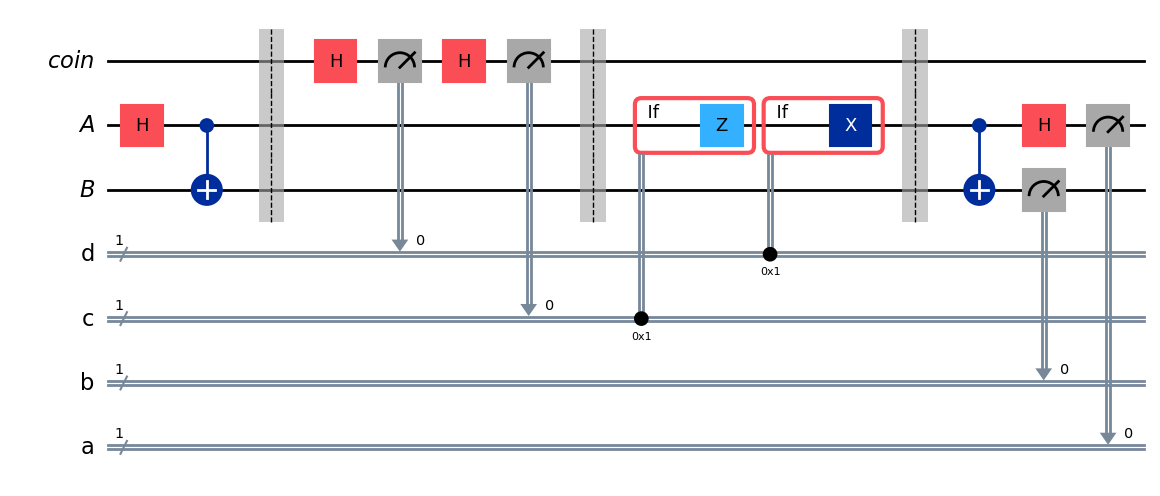

In [2]:
rbg = QuantumRegister(1, "coin")

a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

d = ClassicalRegister(1, "d")
c = ClassicalRegister(1, "c")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

protocol = QuantumCircuit(rbg, ebit0, ebit1, d, c, b, a)

# preparation of ebit
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# prepare coin
protocol.h(rbg)
protocol.measure(rbg, d)
protocol.h(rbg)
protocol.measure(rbg, c)

protocol.barrier()

# alice's part

with protocol.if_test((c,1)):
    protocol.z(ebit0)
with protocol.if_test((d,1)):
    protocol.x(ebit0)
    
protocol.barrier()

#bob's part

protocol.cx(ebit0, ebit1)
protocol.h(ebit0)

protocol.measure(ebit0, a)
protocol.measure(ebit1, b)

display(protocol.draw(output="mpl"))


Measured 0 0 0 0 with frequency 266
Measured 0 1 0 1 with frequency 243
Measured 1 0 1 0 with frequency 260
Measured 1 1 1 1 with frequency 255


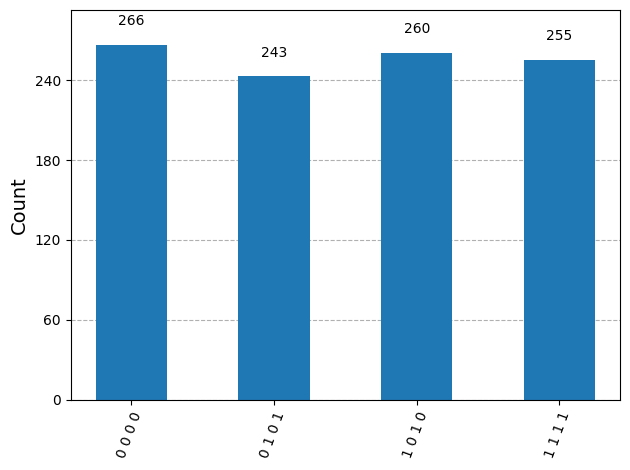

In [3]:
result = AerSimulator().run(protocol).result()
statistics = result.get_counts()
 
for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")
 
display(plot_histogram(statistics))